In [1]:
## Load required modules
import warnings, sys, os ## system
if not sys.warnoptions:
    warnings.simplefilter("ignore") # ignore warnings

import re
import os
import glob
from datetime import datetime    
import time
import copy
import numpy as np
import pandas as pd
import nibabel as nib
import matplotlib.pyplot as plt
from itertools import product, combinations
import multiprocessing as mp


from bids import BIDSLayout, BIDSValidator

from nilearn.maskers import NiftiMasker
from nilearn import plotting, image
from nilearn.glm.first_level import make_first_level_design_matrix, FirstLevelModel
from nilearn.image import concat_imgs, mean_img
from nilearn.plotting import plot_design_matrix
import matplotlib.pyplot as plt

# Load files 
story_dir = '/mnt/c/Users/since/Dropbox/Lab/Projects/CJY/_DATA'
May_dir = '/mnt/c/Users/since/Desktop/KdramaMay/'

In [2]:
# load recall data
import json
import csv
import seaborn as sns

overall_performance_dir = "/mnt/c/Users/since/Dropbox/RAs/projects"


# #Subject check 
sub_sm = np.arange(1,34)
sub_sm_exclude = [8, 25] #exclude 9 & 26
subjects1 = np.delete(sub_sm, sub_sm_exclude)

sub_idx, vis, aud, subj = [], [], [], []
for sub in subjects1:
    
    if sub < 10:
        aud_idx = 'A0'+str(sub)
        vis_idx = 'V0'+str(sub)
        subj_idx = 'S0'+str(sub)
    else:
        aud_idx = 'A'+str(sub)
        vis_idx = 'V'+str(sub)
        subj_idx = 'S'+str(sub)
        
    sub_idx.append(vis_idx)
    sub_idx.append(aud_idx)
    vis.append(vis_idx)
    aud.append(aud_idx)
    subj.append(subj_idx)
    #aud.append(aud_idx)
    
sub_sm2 = np.arange(34,77)
#print(sub_sm2)
sub_sm_exclude2 = [2, 3, 7, 13, 22, 23, 26, 27,28,29,35] #Excluede 36, 37, 41, 47, 56, 57, 60, 61,62,63,69
subjects2 = np.delete(sub_sm2, sub_sm_exclude2)
#print(subjects2)

# Set columns 
sub_idx2, vis2, aud2, subj2 = [], [], [], []
for sub in subjects2:
    
    if sub < 10:
        aud_idx = 'A0'+str(sub)
        vis_idx = 'V0'+str(sub)
        subj_idx = 'S0'+str(sub)
    else:
        aud_idx = 'A'+str(sub)
        vis_idx = 'V'+str(sub)
        subj_idx = 'S'+str(sub)
        
    sub_idx2.append(vis_idx)
    sub_idx2.append(aud_idx)
    vis2.append(vis_idx)
    aud2.append(aud_idx)
    subj2.append(subj_idx)

In [3]:
sub_sm = np.append(subjects1, subjects2)

In [4]:
# load story sequence 
import scipy.io as sio

all_story = {}
# Load May Data
for sub in sub_sm:
    #print(sub)
    mat = sio.loadmat(glob.glob(os.path.join(story_dir, 'fMRItdsgn', f'sub-{sub}_*.mat'))[0])
    story = []
    for i in np.arange(0,4):
        temp = mat['subj'][0][0][7][0][i][0]
        if temp == 'Blind Date':
            temp = 'BlindDate'
        elif temp == 'Runningman':
            temp = 'RunningMan'
        elif temp == 'neighbors':
            temp = 'Neighbors'
        story = np.append(story, temp)
    #all_story[str(int(sub)+8)] = story
    all_story[sub] = story
#Fix story sequence
#story_sequece = all_story[]
#story_sequece

In [5]:
rating_files = "Ratings/2.EventRating"
fpath = os.path.join(overall_performance_dir, 'KiKang' ,rating_files)
print(fpath)
fname1 = 'Event_counting_KK1' +'.xlsx'
fname2 = 'Event_counting_KK2' +'.xlsx'


#sub-01~33
use_cols1 = np.arange(3,65)
use_cols2 = np.arange(3,67)

run = pd.read_excel(os.path.join(fpath, fname1), sheet_name = 'RunningMan',usecols = use_cols1, names = sub_idx)[0:13]
run2 = pd.read_excel(os.path.join(fpath, fname1), sheet_name = 'RunningMan2',usecols = use_cols1, names = sub_idx)[0:13]
run3 = pd.read_excel(os.path.join(fpath, fname2), sheet_name = 'RunningMan',usecols = use_cols2, names = sub_idx2)[0:13]
run4 = pd.read_excel(os.path.join(fpath, fname2), sheet_name = 'RunningMan2',usecols = use_cols2, names = sub_idx2)[0:13]

nei = pd.read_excel(os.path.join(fpath, fname1), sheet_name = 'Neigobors',usecols = use_cols1, names = sub_idx)[0:13]
nei2 = pd.read_excel(os.path.join(fpath, fname1), sheet_name = 'Neighbors2',usecols = use_cols1, names = sub_idx)[0:13]
nei3 = pd.read_excel(os.path.join(fpath, fname2), sheet_name = 'Neigobors',usecols = use_cols2, names = sub_idx2)[0:13]
nei4 = pd.read_excel(os.path.join(fpath, fname2), sheet_name = 'Neighbors2',usecols = use_cols2, names = sub_idx2)[0:13]

dre = pd.read_excel(os.path.join(fpath, fname1), sheet_name = 'Dream',usecols = use_cols1, names = sub_idx)[0:12]
dre2 = pd.read_excel(os.path.join(fpath, fname1), sheet_name = 'Dream2',usecols = use_cols1, names = sub_idx)[0:12]
dre3 = pd.read_excel(os.path.join(fpath, fname2), sheet_name = 'Dream',usecols = use_cols2, names = sub_idx2)[0:12]
dre4 = pd.read_excel(os.path.join(fpath, fname2), sheet_name = 'Dream2',usecols = use_cols2, names = sub_idx2)[0:12]


bli = pd.read_excel(os.path.join(fpath, fname1), sheet_name = 'BlindDate',usecols = use_cols1, names = sub_idx)[0:13]
bli2 = pd.read_excel(os.path.join(fpath, fname1), sheet_name = 'BlindDate2',usecols = use_cols1, names = sub_idx)[0:13]
bli3 = pd.read_excel(os.path.join(fpath, fname2), sheet_name = 'BlindDate',usecols = use_cols2, names = sub_idx2)[0:13]
bli4 = pd.read_excel(os.path.join(fpath, fname2), sheet_name = 'BlindDate2',usecols = use_cols2, names = sub_idx2)[0:13]


#df NAN to Zero 
nei3 = nei3.fillna(0)
dre = dre.fillna(0)
dre2 = dre2.fillna(0)
dre3 = dre3.fillna(0)
dre4 = dre4.fillna(0)
bli3 = bli3.fillna(0)
bli4 = bli4.fillna(0)


overall1 = {'run' : run, 'nei':nei, 'dream': dre, 'blind':bli}
overall2 = {'run' : run2, 'nei':nei2, 'dream': dre2, 'blind':bli2}
overall3 = {'run' : run3, 'nei':nei3, 'dream': dre3, 'blind':bli3}
overall4 = {'run' : run4, 'nei':nei4, 'dream': dre4, 'blind':bli4}

/mnt/c/Users/since/Dropbox/RAs/projects/KiKang/Ratings/2.EventRating


In [6]:
# detail model
story_onset =  {'run' : [15, 24,36,39,48,63,72,84,96,129,144,162,168], 'nei': [15,24,33,39,51,63,78,90,108,129,141,156,171], 
                'dream': [15, 27,39,45,63,75,87,102,114,129,144,159] , 'blind': [ 15, 30, 42, 54, 63, 75, 87, 111, 120, 132, 138, 156, 174] }
story_offset =  {'run' : [23,35,38,47,62,71,83,95,128,143,161,167,180], 'nei': [23,32,39,50,62,77,89,107,128,140,155,170,180], 
                 'dream': [26, 38, 44, 62, 74, 86, 101, 113, 128, 143, 158, 165] , 'blind': [29, 41, 53, 62, 74, 86, 110, 119, 131, 137, 155, 173, 180] }

eb_onset = {'run':[15,40,68,85,147], 'dream':[15,40,77,132], 'nei':[15,33,65, 81, 107, 140], 'blind':[15, 55, 90, 131, 157]}
eb_offset = {'run':[40,68,85,147,180], 'dream':[40,77,132,165], 'nei':[33,65, 81, 107, 140, 180], 'blind':[55, 90, 131, 157, 180]}

storyName = {'RunningMan': 'run', 'BlindDate': 'blind', 'Dream':'dream', 'Neighbors':'nei'}

onset = {'Dream1': [0, 165, 345, 525], 'Dream2': [0, 180, 345, 525], 'Dream3': [0, 180, 360, 525], 'Dream4': [0, 180, 345, 540]}


sub_recall_dm = {} 
for sub in sub_sm:
    #print(sub)

    if sub < 10 : 
        vis_sub = 'V0'+str(sub)
        aud_sub = 'A0'+str(sub)
        
    else: 
        vis_sub = 'V'+str(sub)
        aud_sub = 'A'+str(sub)
    if sub < 34 : 
        encoding = {1: overall1, 2: overall2}
    else: 
        encoding = {1: overall3, 2: overall4}
        
    # Generate the events data frame
    sequence = np.where(all_story[sub]=='Dream')[0][0]
    story_sequence = 'Dream'+str(int(sequence)+1)
    
    run_recall_dm = {} 
    for run in [1,2]: 
        scene_list,events_list = [], []
        for story in np.arange(0,4):    
            thisStory = storyName[all_story[sub][story]]
            duration = [ai - bi for ai, bi in zip(eb_offset[thisStory], eb_onset[thisStory])]
            for event in range(len(eb_onset[thisStory])):
                events_list.append({
                    'onset': onset[story_sequence][story] + eb_onset[thisStory][event],
                    'duration': duration[event],
                    'trial_type': f'{thisStory}{event}' ,
                    'modulation': 1
                })

            for event in range(12):

                scene_list.append({
                    'onset': onset[story_sequence][story] + story_onset[thisStory][event],
                    'duration': story_offset[thisStory][event] - story_onset[thisStory][event],
                    'modulation' : encoding[run][thisStory][vis_sub][event],
                    'trial_type': 'vis'
                })

            for event in range(12): 
                scene_list.append({
                    'onset': onset[story_sequence][story] + story_onset[thisStory][event],
                    'duration':story_offset[thisStory][event] - story_onset[thisStory][event],
                    'modulation' : encoding[run][thisStory][aud_sub][event],
                    'trial_type': 'aud'
                })
        scene_events = pd.DataFrame(scene_list)
        events = pd.DataFrame(events_list)
        event_detail = pd.concat([scene_events,events])   
        run_recall_dm[run] = event_detail
    sub_recall_dm[sub] = run_recall_dm

A 'modulation' column was found in the given events data and is used.
event_size (116, 4)
desingMatrix_size (477, 37)


<AxesSubplot:label='conditions', ylabel='scan number'>

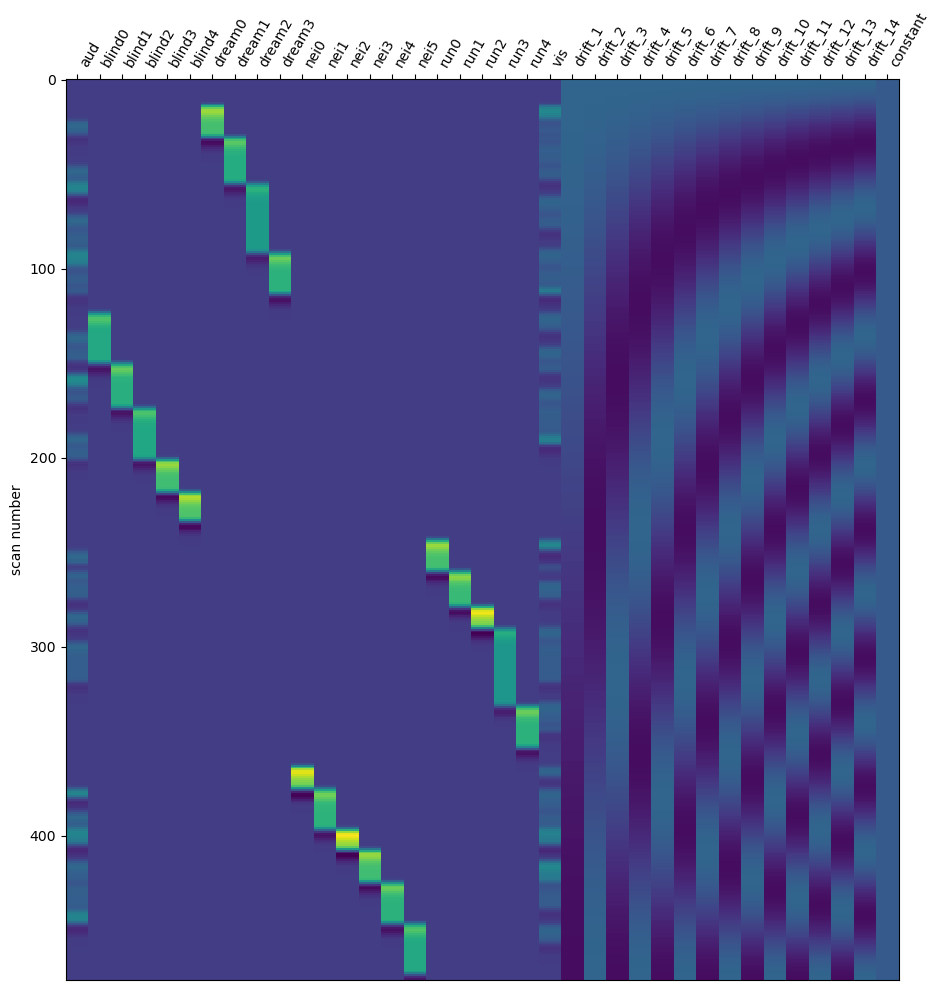

In [7]:
tr = 1.5  # Repetition time in seconds
dummy = 9 
n_scans = 477
frame_times = np.arange(0, n_scans * tr, tr) # Frame times: time for each scan

# Build a design matrix 
design_matrix = make_first_level_design_matrix(frame_times,event_detail,drift_model='cosine')
print('event_size' , event_detail.shape)
print('desingMatrix_size', design_matrix.shape)

# Plot the design matrix
plot_design_matrix(design_matrix)

In [7]:
# detail model
story_onset =  {'run' : [15, 24,36,39,48,63,72,84,96,129,144,162,168], 'nei': [15,24,33,39,51,63,78,90,108,129,141,156,171], 
                'dream': [15, 27,39,45,63,75,87,102,114,129,144,159] , 'blind': [ 15, 30, 42, 54, 63, 75, 87, 111, 120, 132, 138, 156, 174] }
story_offset =  {'run' : [23,35,38,47,62,71,83,95,128,143,161,167,180], 'nei': [23,32,39,50,62,77,89,107,128,140,155,170,180], 
                 'dream': [26, 38, 44, 62, 74, 86, 101, 113, 128, 143, 158, 165] , 'blind': [29, 41, 53, 62, 74, 86, 110, 119, 131, 137, 155, 173, 180] }

eb_onset = {'run':[15,40,68,85,147], 'dream':[15,40,77,132], 'nei':[15,33,65, 81, 107, 140], 'blind':[15, 55, 90, 131, 157]}
eb_offset = {'run':[40,68,85,147,180], 'dream':[40,77,132,165], 'nei':[33,65, 81, 107, 140, 180], 'blind':[55, 90, 131, 157, 180]}

storyName = {'RunningMan': 'run', 'BlindDate': 'blind', 'Dream':'dream', 'Neighbors':'nei'}

onset = {'Dream1': [0, 165, 345, 525], 'Dream2': [0, 180, 345, 525], 'Dream3': [0, 180, 360, 525], 'Dream4': [0, 180, 345, 540]}


sub_recall_dm = {} 
for sub in sub_sm:
    #print(sub)

    if sub < 10 : 
        vis_sub = 'V0'+str(sub)
        aud_sub = 'A0'+str(sub)
        
    else: 
        vis_sub = 'V'+str(sub)
        aud_sub = 'A'+str(sub)
    if sub < 34 : 
        encoding = {'first': overall1, 'second': overall2}
    else: 
        encoding = {'first': overall3, 'second': overall4}
    # Generate the events data frame
    sequence = np.where(all_story[sub]=='Dream')[0][0]
    story_sequence = 'Dream'+str(int(sequence)+1)
    timeline = {'first': 0, 'second': 715}
    scene_list = []
    for story in np.arange(0,4):    
        thisStory = storyName[all_story[sub][story]] 
        for cond in ['first','second']:

            for event in range(12):

                scene_list.append({
                    'onset': timeline[cond] + onset[story_sequence][story] + story_onset[thisStory][event],
                    'duration': story_offset[thisStory][event] - story_onset[thisStory][event],
                    'modulation' : encoding[cond][thisStory][vis_sub][event],
                    'trial_type': f'{cond}_vis'
                })
                
            for event in range(12): 
                scene_list.append({
                    'onset': timeline[cond] +  onset[story_sequence][story] + story_onset[thisStory][event],
                    'duration':story_offset[thisStory][event] - story_onset[thisStory][event],
                    'modulation' : encoding[cond][thisStory][aud_sub][event],
                    'trial_type': f'{cond}_aud'
                })

    # Convert to DataFrame
    scene_events = pd.DataFrame(scene_list)
    
    
    # Generate the events data frame
    sequence = np.where(all_story[sub]=='Dream')[0][0]
    cond = 'Dream'+str(int(sequence)+1)
    
    timeline = {'first': 0, 'second': 715}
    events_list = []
    for story in np.arange(0,4):    
        thisStory = storyName[all_story[sub][story]] 
        duration = [ai - bi for ai, bi in zip(eb_offset[thisStory], eb_onset[thisStory])]
        for session in ['first','second']:

            for event in range(len(eb_onset[thisStory])):
                events_list.append({
                    'onset': timeline[session] + onset[cond][story] + eb_onset[thisStory][event],
                    'duration': duration[event],
                    'trial_type': f'{thisStory}{event}' ,
                    'modulation': 1
                })
                
    events = pd.DataFrame(events_list)
    
    event_detail = pd.concat([scene_events,events])
    
    sub_recall_dm[sub] = event_detail

In [8]:
#Subject check 
data_dir = os.path.join(May_dir, 'data', 'derivatives')
file_list = glob.glob(os.path.join(data_dir, 'sub-*', 'func', f'*task-encoding_run-1_space-MNI152NLin6Asym_res-2_desc-brain_mask.nii.gz'))

sub_sm =[] 
for filename in file_list: 
    sub = os.path.basename(filename).split('_')[0]
    sub = os.path.basename(sub).split('-')[1]
    sub_sm.append(int(sub)) 

# sub_sm_exclude = [0, 1,2,  24, 48, 56] #  1, 26 57 69 
# sub_sm = np.delete(sub_sm, sub_sm_exclude)
print(sub_sm)

[1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 38, 39, 40, 42, 43, 44, 45, 46, 48, 49, 51, 52, 53, 54, 55, 57, 58, 59, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76]


70
A 'modulation' column was found in the given events data and is used.
event_size (116, 4)
desingMatrix_size (477, 37)
Load concatenated func_img files
Image shape: (91, 109, 91, 477)
start fitting GLM
save betas
A 'modulation' column was found in the given events data and is used.
event_size (116, 4)
desingMatrix_size (477, 37)
Load concatenated func_img files
Image shape: (91, 109, 91, 477)
start fitting GLM
save betas
71
A 'modulation' column was found in the given events data and is used.
event_size (116, 4)
desingMatrix_size (477, 37)
Load concatenated func_img files
Image shape: (91, 109, 91, 477)
start fitting GLM
save betas
A 'modulation' column was found in the given events data and is used.
event_size (116, 4)
desingMatrix_size (477, 37)
Load concatenated func_img files
Image shape: (91, 109, 91, 477)
start fitting GLM
save betas
72
A 'modulation' column was found in the given events data and is used.
event_size (116, 4)
desingMatrix_size (477, 37)
Load concatenated func_im

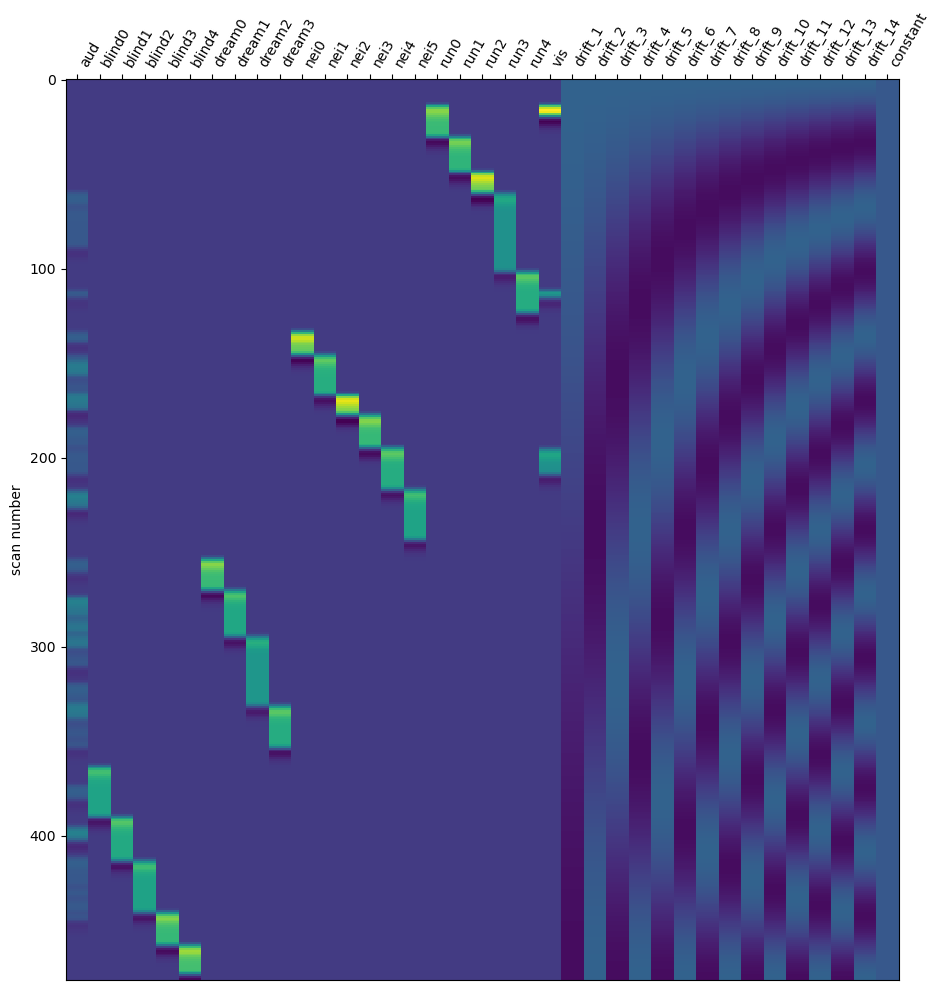

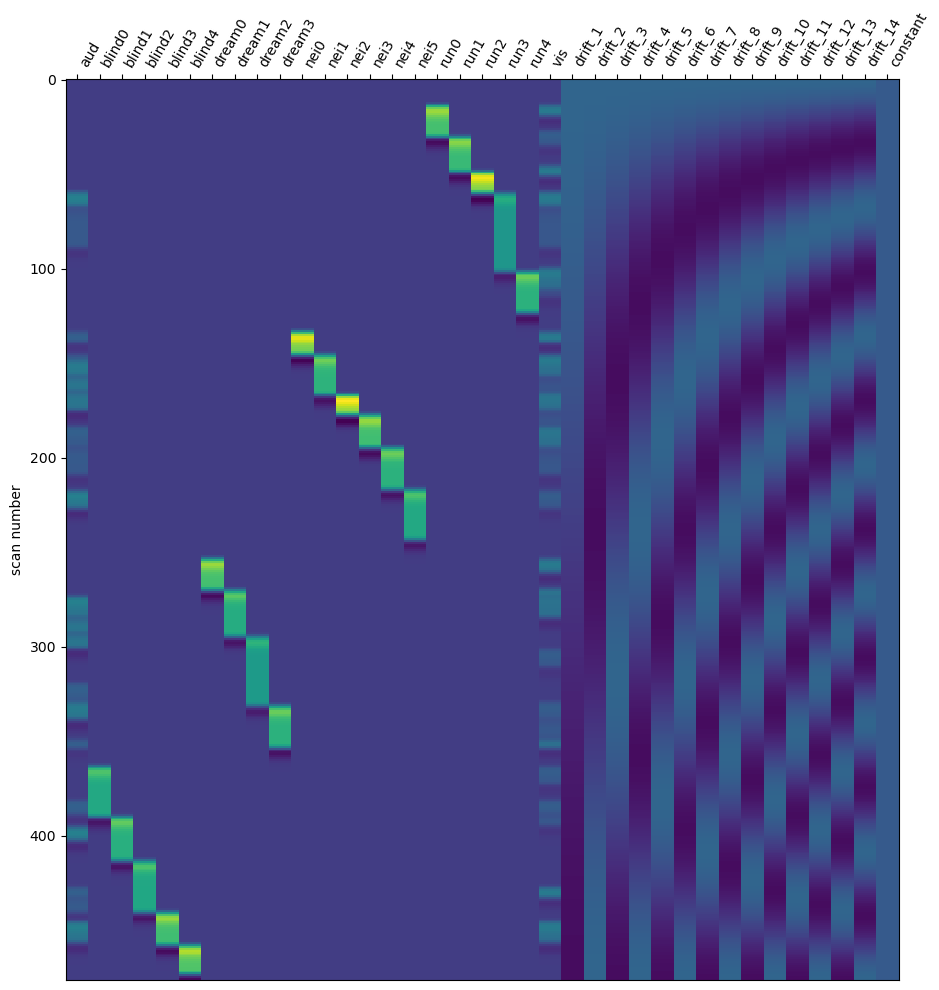

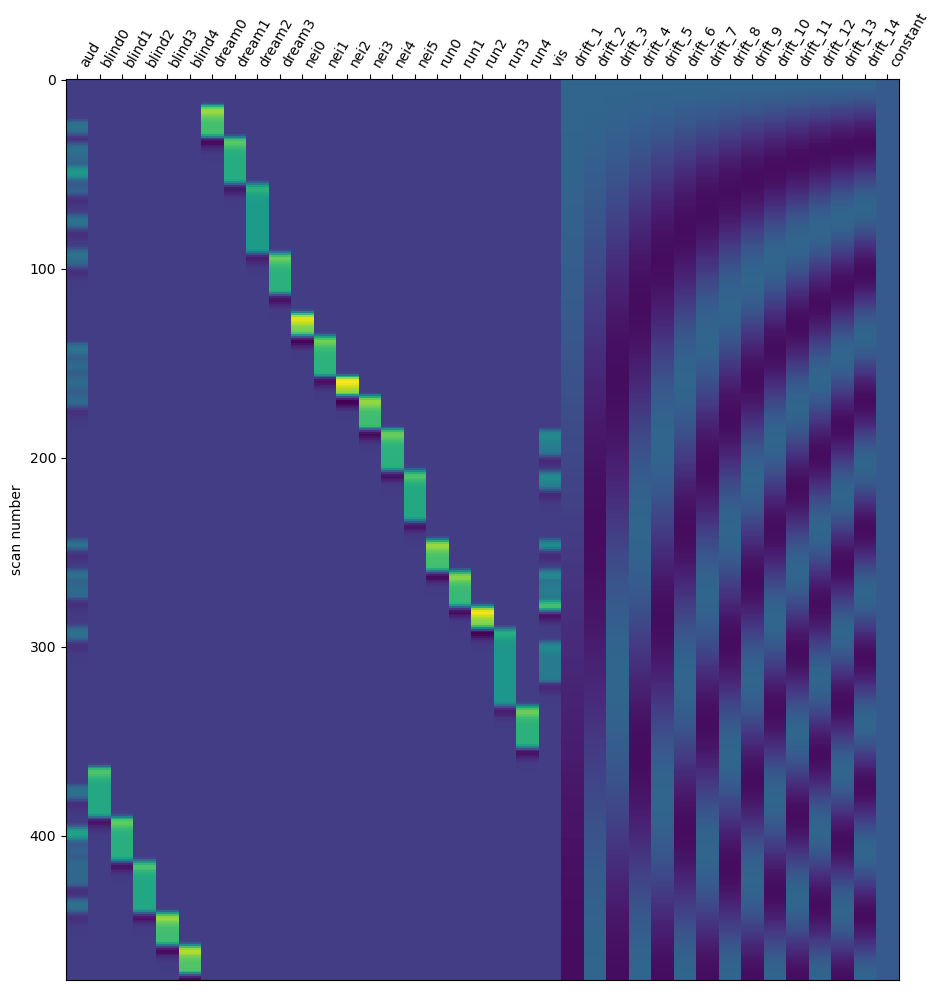

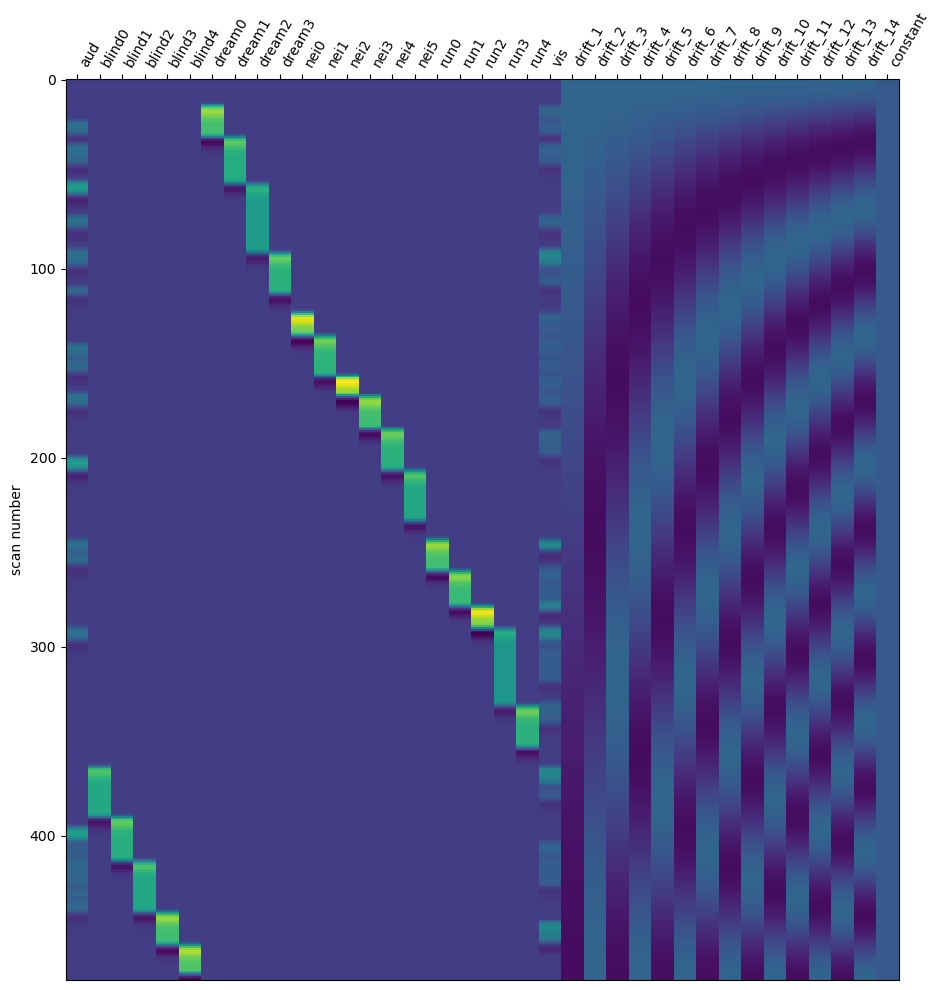

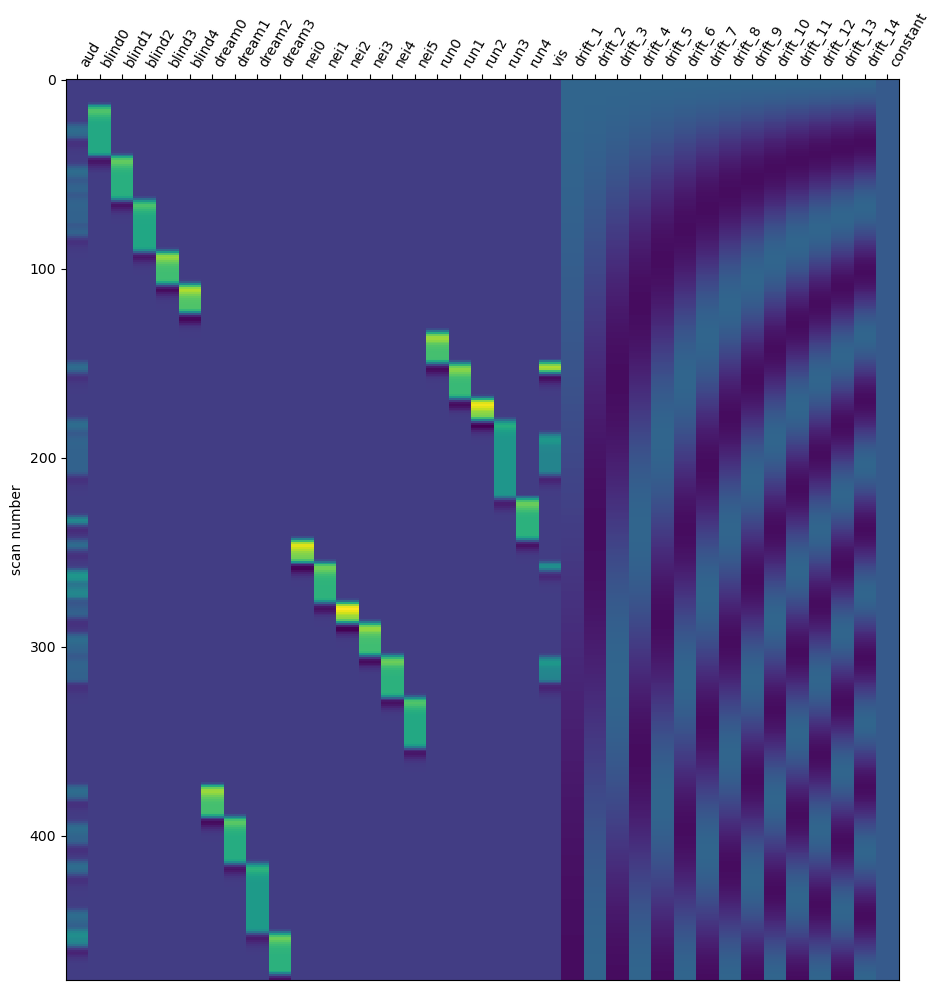

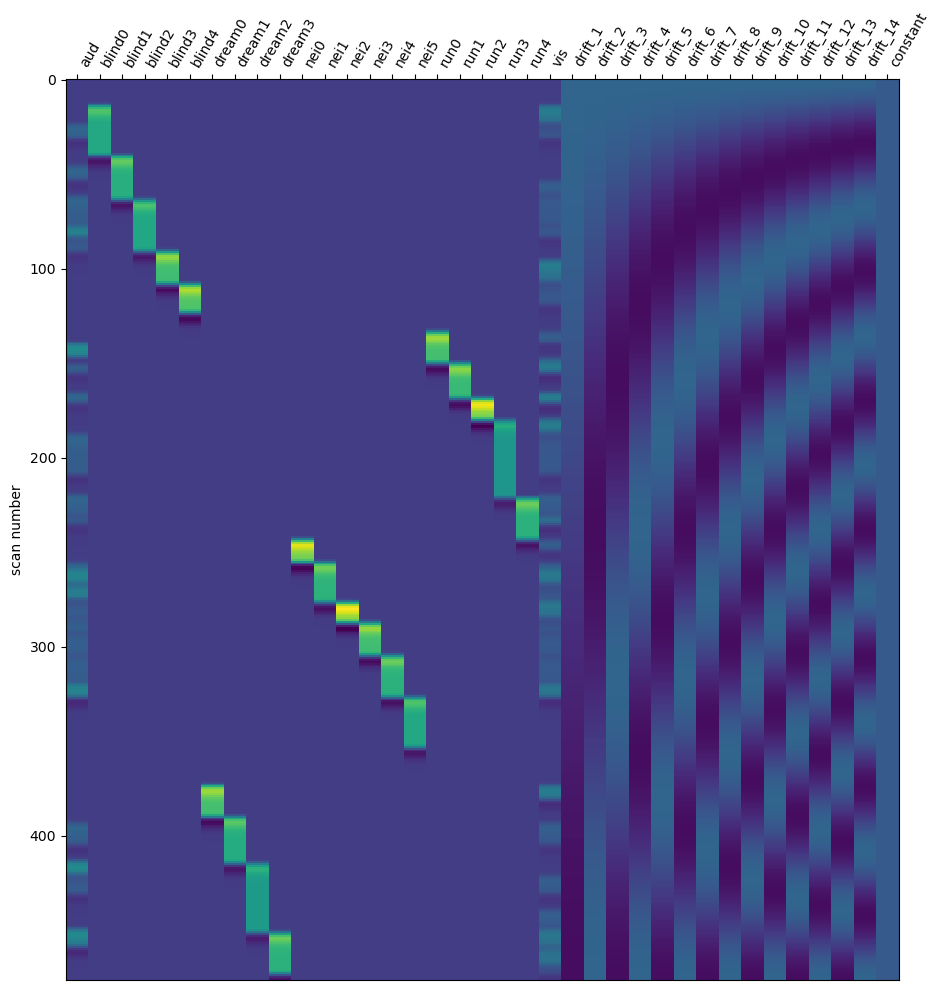

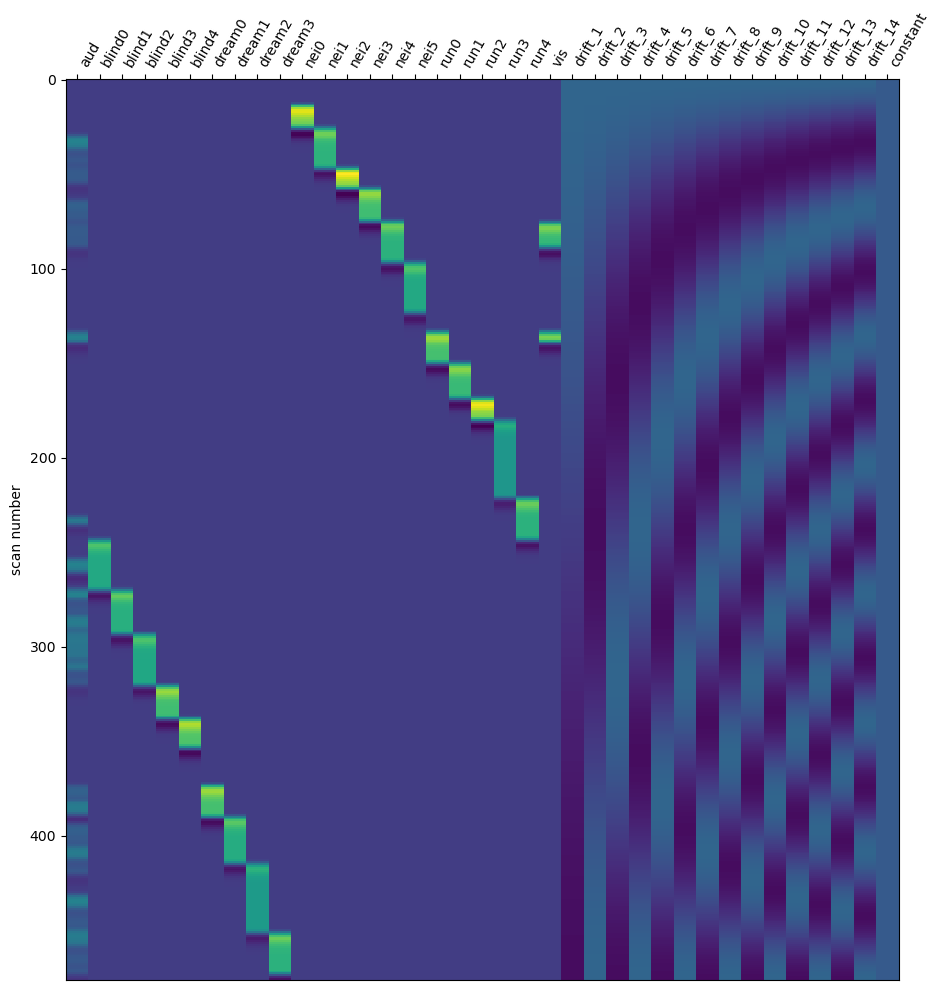

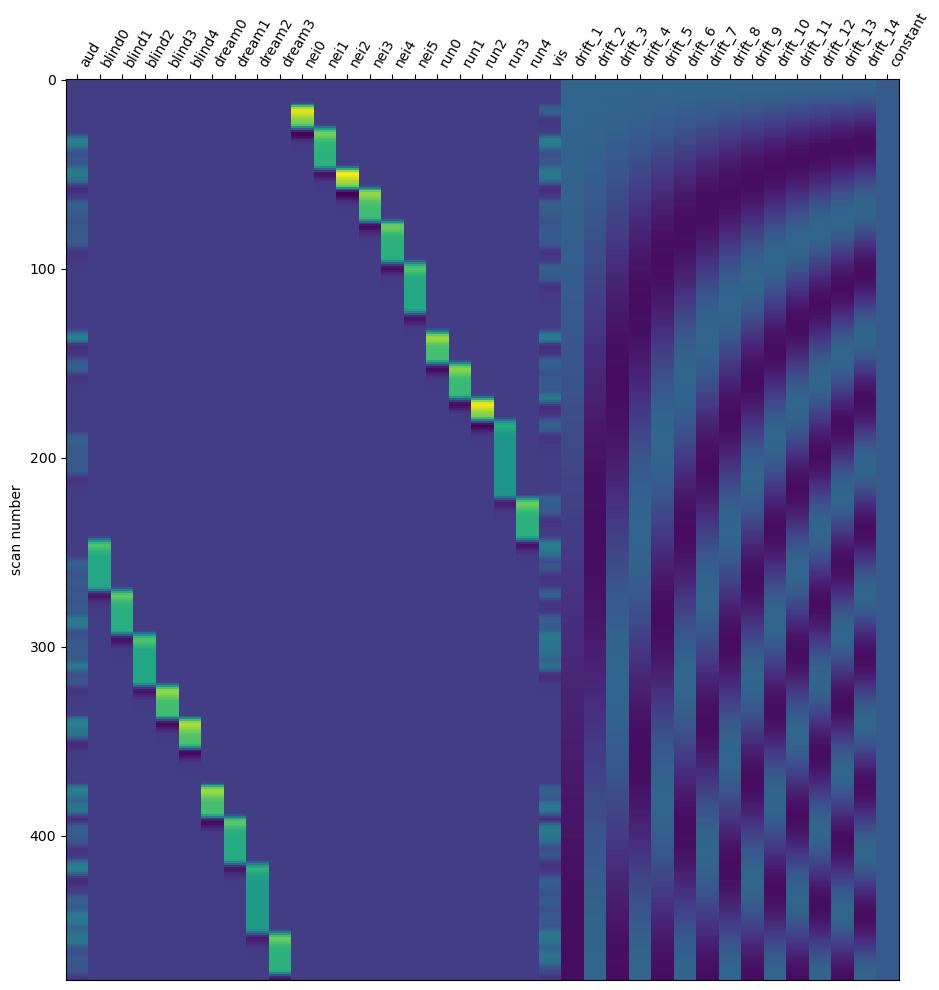

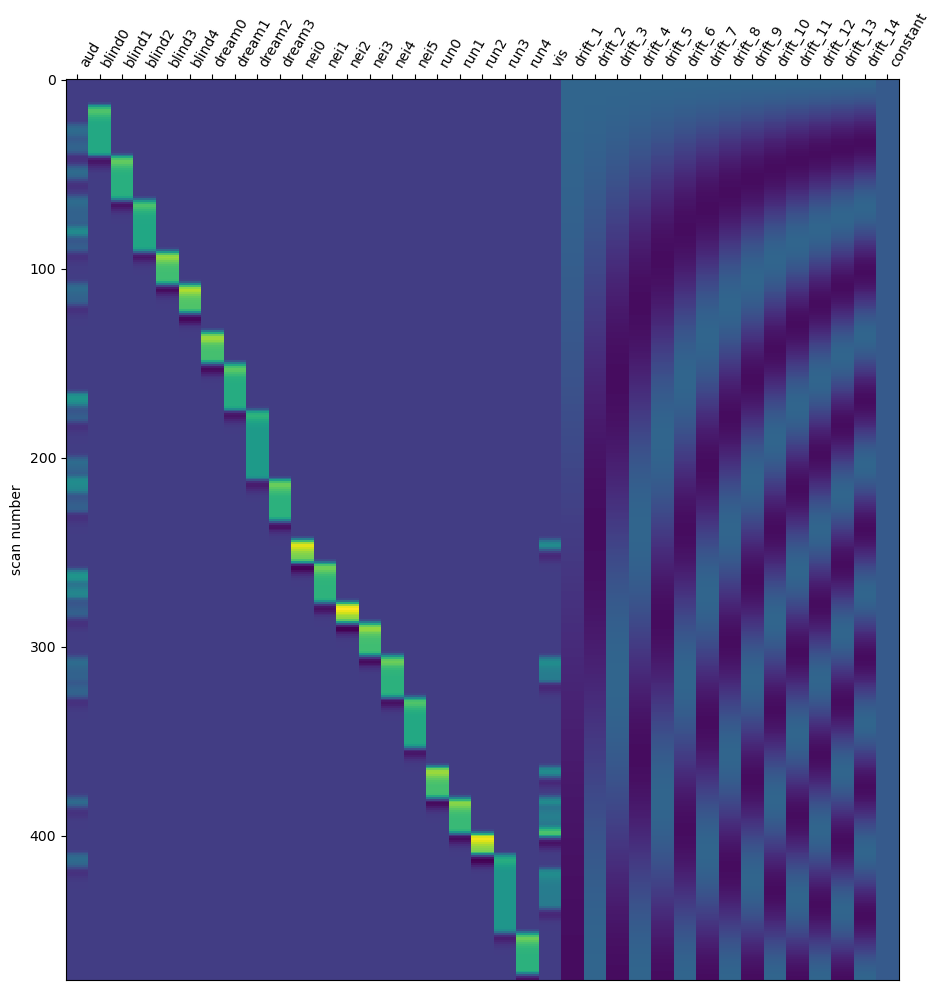

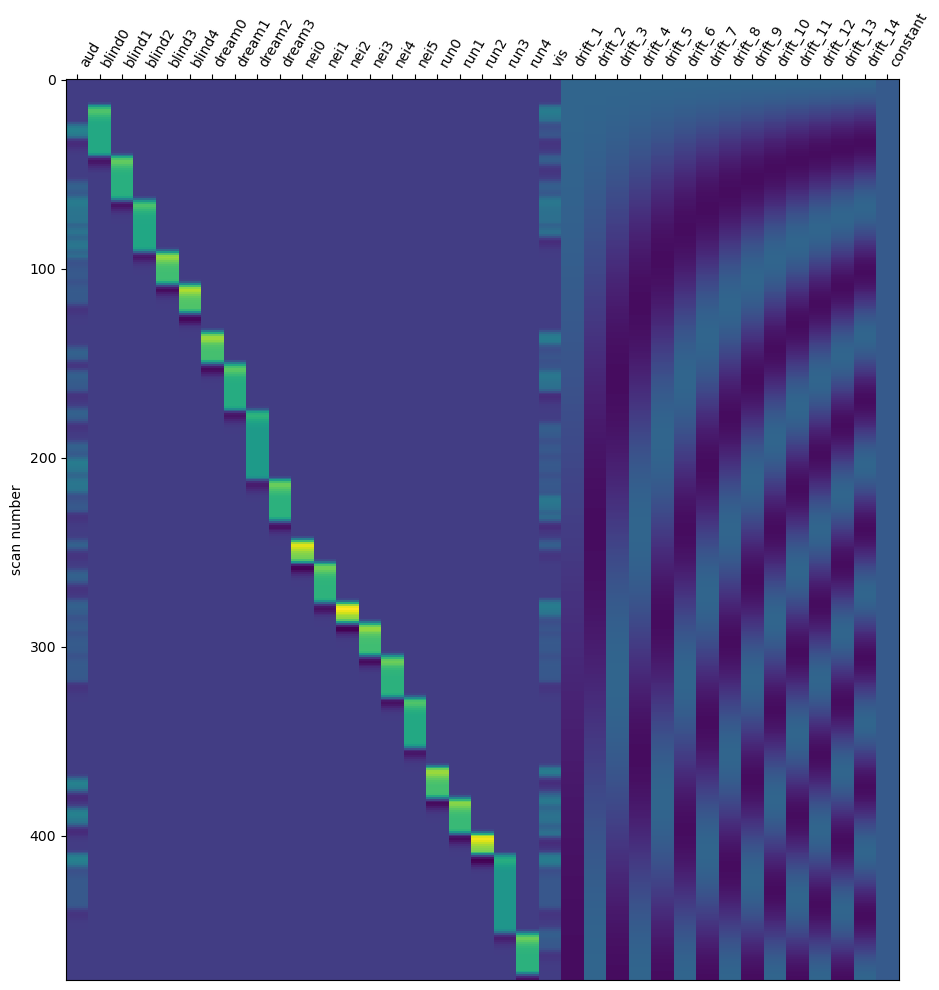

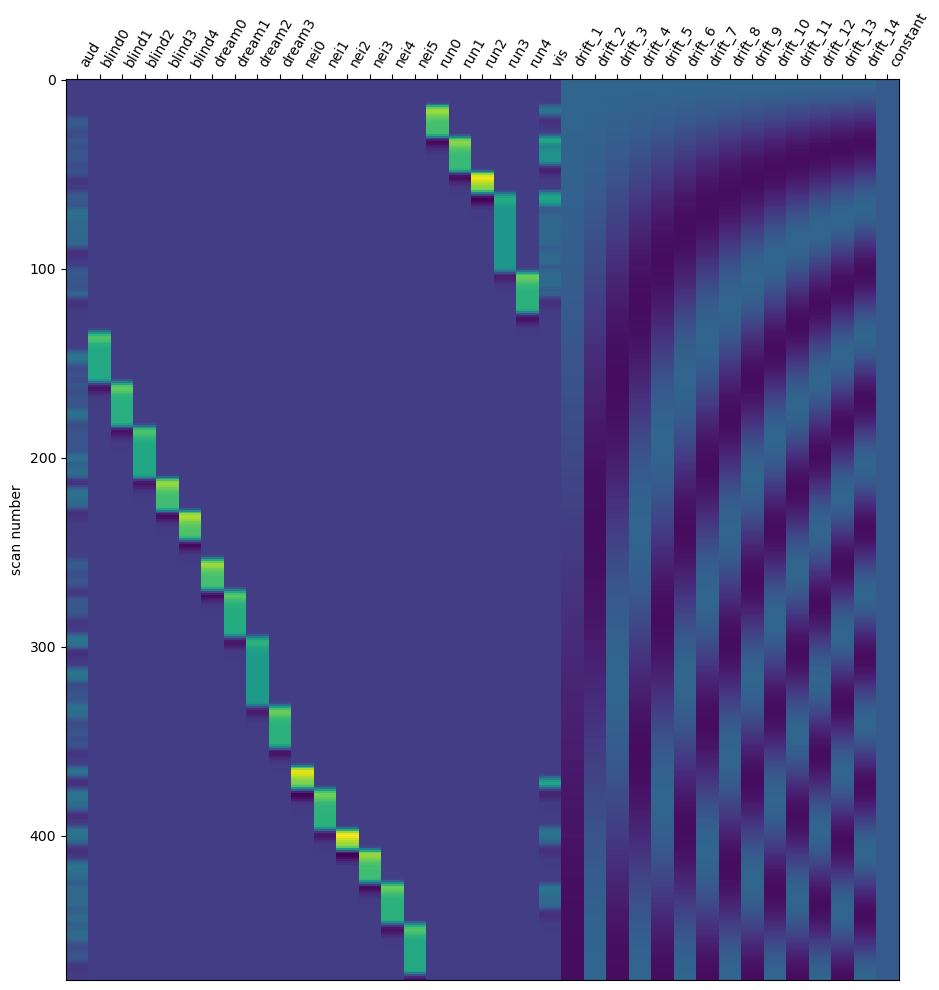

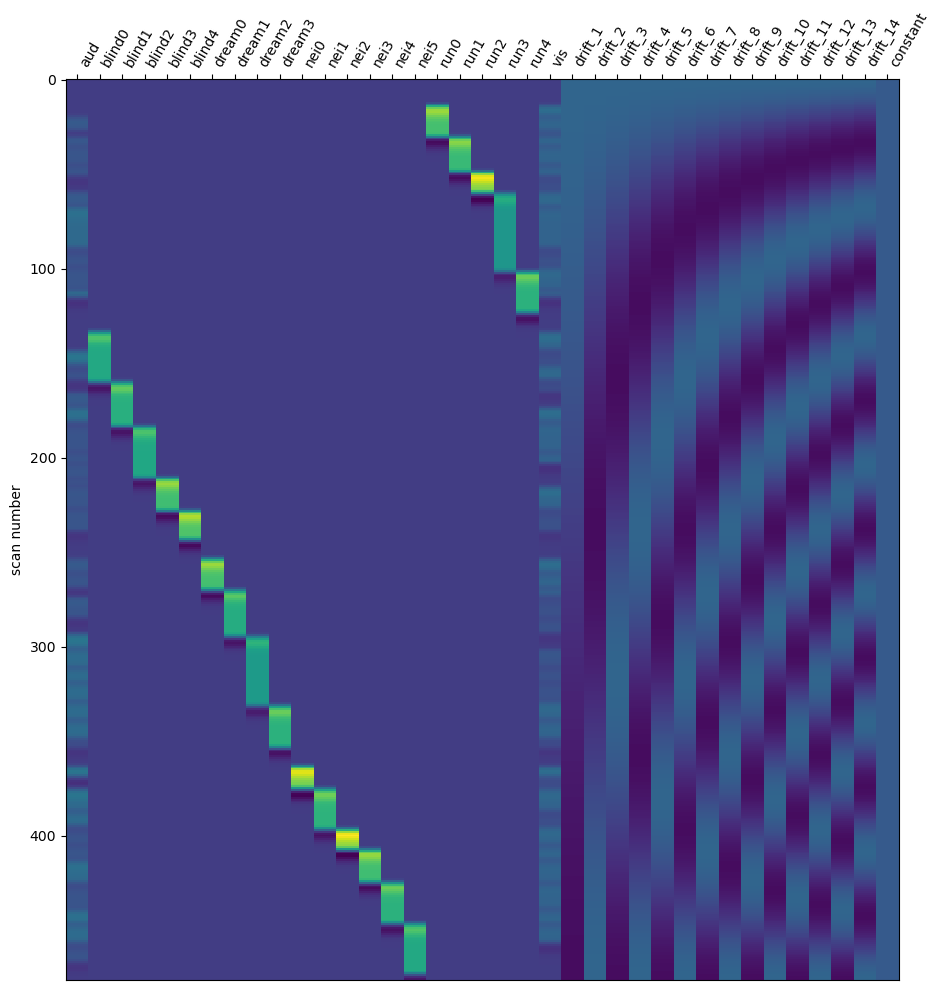

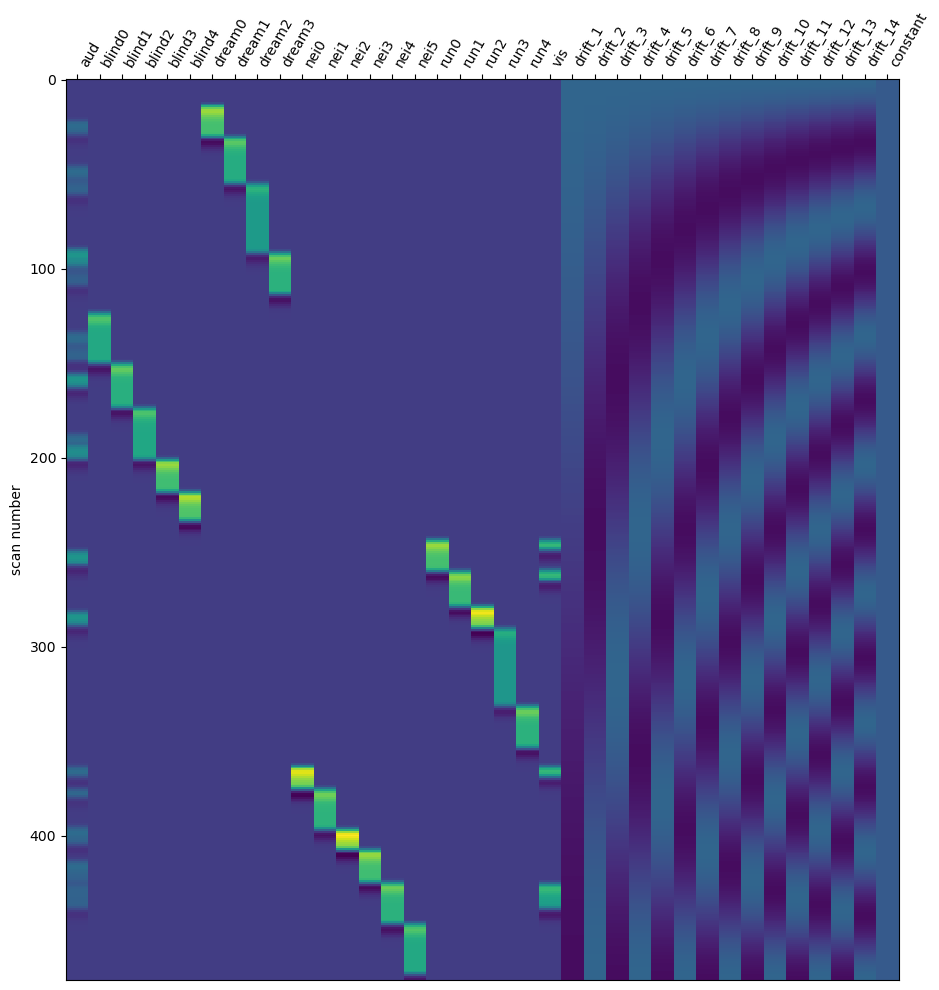

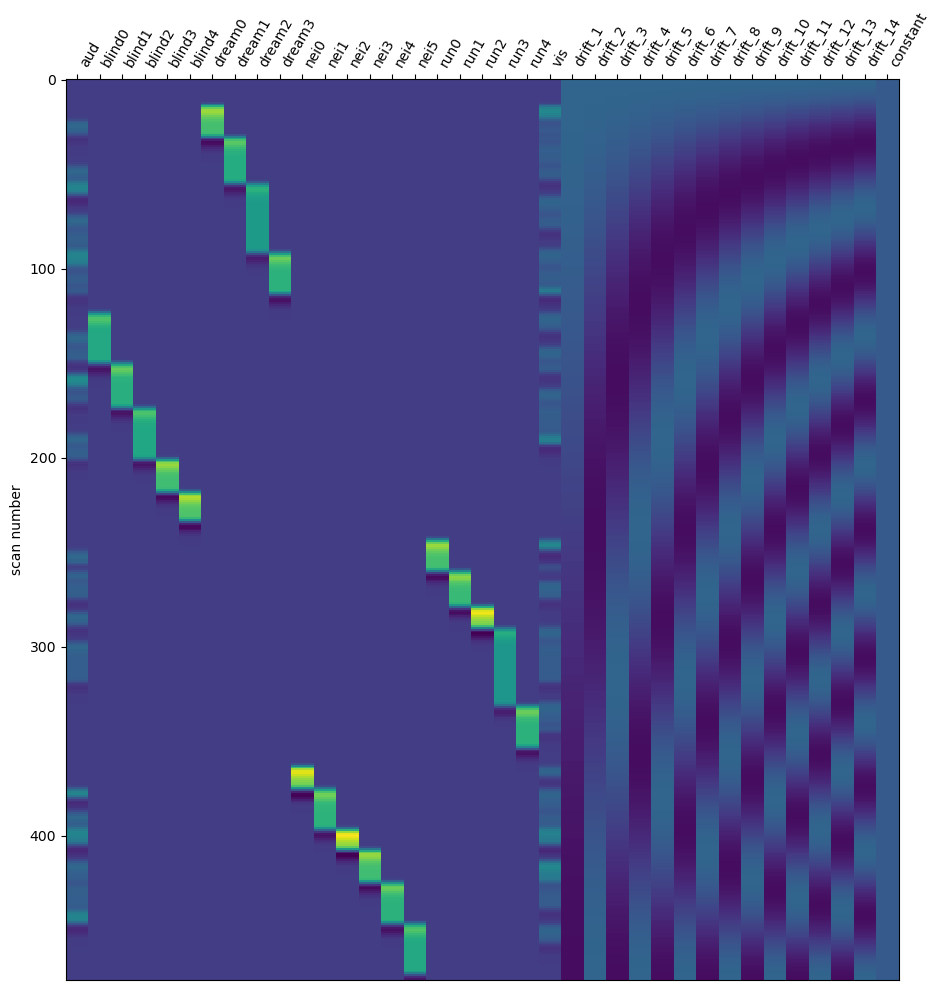

In [14]:
# Data Load & Trimming 
event_types = ['vis','aud', 
               'blind0', 'blind1', 'blind2', 'blind3', 'blind4', 
               'dream0','dream1', 'dream2', 'dream3', 
               'nei0', 'nei1', 'nei2', 'nei3','nei4', 'nei5', 
               'run0', 'run1', 'run2', 'run3', 'run4'] 

tr = 1.5  # Repetition time in seconds
dummy = 9 

sub_sm = [70, 71, 72, 73, 74, 75, 76] 
#load BOLD Volume
for sub in sub_sm: 
#for sub in subjects: 
    print(sub)
    
    for run in [1,2]: 
        events = pd.DataFrame(sub_recall_dm[sub][run])

        # Calculate the total number of scans
        #total_time = events['onset'].iloc[-1] +  events['duration'].iloc[-1] + dummy  # Time after last event ends
        n_scans = 477
        frame_times = np.arange(0, n_scans * tr, tr) # Frame times: time for each scan

        # Build a design matrix 
        design_matrix = make_first_level_design_matrix(frame_times,events,drift_model='cosine')
        print('event_size' , events.shape)
        print('desingMatrix_size', design_matrix.shape)

        # Plot the design matrix
        plot_design_matrix(design_matrix)
        plot_path = os.path.join(May_dir, 'GLM', 'event_detail_model', 'dm', f"sub-{sub}_task-encoding_run-{run}_designMatrix.png")
        plt.savefig(plot_path)

        #========================================================================================================
        #encoding_file = glob.glob(os.path.join(May_dir,'denoised', f"sub-{sub}_task-encoding_concatenated.nii.gz"))

        if sub < 10: 
            encoding_files = glob.glob(os.path.join(May_dir,'denoised', f"sub-0{sub}_task-encoding_run-{run}_4scNsm.nii.gz"))
        else: 
            encoding_files = glob.glob(os.path.join(May_dir,'denoised', f"sub-{sub}_task-encoding_run-{run}_4scNsm.nii.gz"))
            
        # Load fmri imgs for Fitting     
        print(f'Load concatenated func_img files')
        func_img = image.load_img(encoding_files) 
        print('Image shape:', func_img.shape)
        
        print('start fitting GLM') 
        glm = FirstLevelModel(t_r=1.5, hrf_model='glover', drift_model='cosine')
        glm = glm.fit(func_img, design_matrices=design_matrix)
        
        print('save betas')
        for event in event_types: 
            beta = glm.compute_contrast(event)
            beta_img_path = os.path.join(May_dir,'GLM', 'event_detail_model', 'betas', f"sub-{sub}_run-{run}_task-encoding_betas_{event}_image.nii.gz")
            nib.save(beta, beta_img_path)
    #print(f'finish GLM for {sub}')

In [9]:
sub_sm_exclude = [0] #exclude 9 & 26
subjects1 = np.delete(subjects1, sub_sm_exclude)
print(subjects1)
print(len(subjects1))

# Sub-34~76 
sub_sm_exclude = [12] #exclude 50
subjects2 = np.delete(subjects2, sub_sm_exclude)
print(subjects2)
print(len(subjects2))

[ 2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 27
 28 29 30 31 32 33]
30
[34 35 38 39 40 42 43 44 45 46 48 49 51 52 53 54 55 58 59 64 65 66 67 68
 70 71 72 73 74 75 76]
31


In [11]:
vis1_dat

nltools.data.brain_data.Brain_Data(data=(30, 238955), Y=0, X=(0, 0), mask=MNI152_T1_2mm_brain_mask.nii.gz)

In [12]:
from nltools.data import Brain_Data

# sub-01~33
vis1_list, aud2_list, vis2_list = [], [], []
for sub in subjects1:
    vis1 =  os.path.join(May_dir,'GLM', 'event_detail_model', 'betas', f"sub-{sub}_run-1_task-encoding_betas_vis_image.nii.gz")
    vis1_list.append(vis1)
    
    aud2 = os.path.join(May_dir,'GLM', 'event_detail_model', 'betas',  f"sub-{sub}_run-2_task-encoding_betas_aud_image.nii.gz")
    aud2_list.append(aud2)
    
    vis2 = os.path.join(May_dir,'GLM', 'event_detail_model', 'betas',  f"sub-{sub}_run-2_task-encoding_betas_vis_image.nii.gz")
    vis2_list.append(vis2)
    
vis1_dat = Brain_Data(vis1_list)
vis2_dat = Brain_Data(vis2_list)
aud2_dat = Brain_Data(aud2_list)

con1_stats = vis2_dat - vis1_dat
con2_stats = aud2_dat - vis1_dat

con1_stats = con1_stats.ttest()
con2_stats = con2_stats.ttest()
t_stat_img = con1_stats['t'].to_nifti()
t_stat_img2 = con2_stats['t'].to_nifti()

output_dir = os.path.join(May_dir,'GLM', 'event_detail_model', 'results') 
beta_img_path1 = os.path.join(output_dir, f"ttested_task-encoding_betas_contrast-vis2vis1_uncorrected_image.nii.gz")
beta_img_path2 = os.path.join(output_dir, f"ttested_task-encoding_betas_contrast-VA_aud2vis1_uncorrected_image.nii.gz")


nib.save(t_stat_img, beta_img_path1)
nib.save(t_stat_img2, beta_img_path2)


con1_stats = vis2_dat - vis1_dat
con2_stats = aud2_dat - vis1_dat

con1_stats = con1_stats.ttest(threshold_dict={'fdr':.05})
con2_stats = con2_stats.ttest(threshold_dict={'fdr':.05})
t_stat_img = con1_stats['thr_t'].to_nifti()
t_stat_img2 = con2_stats['thr_t'].to_nifti()

output_dir = os.path.join(May_dir,'GLM', 'event_detail_model', 'results') 
beta_img_path1 = os.path.join(output_dir, f"ttested_task-encoding_betas_contrast-vis2vis1_fdr_corrected_image.nii.gz")
beta_img_path2 = os.path.join(output_dir, f"ttested_task-encoding_betas_contrast-VA_aud2vis1_fdr_corrected_image.nii.gz")

nib.save(t_stat_img, beta_img_path1)
nib.save(t_stat_img2, beta_img_path2)

In [15]:
# Sub-34~76 
output_dir = os.path.join(May_dir,'GLM', 'event_detail_model', 'results') 
aud1_list, aud2_list, vis2_list = [], [], []
for sub in subjects2:
    aud1 =  os.path.join(May_dir,'GLM', 'event_detail_model', 'betas', f"sub-{sub}_run-1_task-encoding_betas_aud_image.nii.gz")
    aud1_list.append(aud1)
    
    aud2 = os.path.join(May_dir,'GLM', 'event_detail_model', 'betas',  f"sub-{sub}_run-2_task-encoding_betas_aud_image.nii.gz")
    aud2_list.append(aud2)
    
    vis2 = os.path.join(May_dir,'GLM', 'event_detail_model', 'betas',  f"sub-{sub}_run-2_task-encoding_betas_vis_image.nii.gz")
    vis2_list.append(vis2)
    
aud1_dat = Brain_Data(aud1_list)
vis2_dat = Brain_Data(vis2_list)
aud2_dat = Brain_Data(aud2_list)

print('first contrast')
con1_stats = aud2_dat - aud1_dat
con2_stats = vis2_dat -aud1_dat

con2_stats = con2_stats.ttest()
con1_stats = con1_stats.ttest()
t_stat_img = con1_stats['t'].to_nifti()
t_stat_img2 = con2_stats['t'].to_nifti()

beta_img_path1 = os.path.join(output_dir, f"ttested_task-encoding_betas_contrast-aud2aud1_uncorrected_image.nii.gz")
beta_img_path2 = os.path.join(output_dir, f"ttested_task-encoding_betas_contrast-AV_vis2aud1_uncorrected_image.nii.gz")

nib.save(t_stat_img, beta_img_path1)
nib.save(t_stat_img2, beta_img_path2)


con1_stats = aud2_dat - aud1_dat
con2_stats = vis2_dat -aud1_dat

con1_stats = con1_stats.ttest(threshold_dict={'fdr':.05})
con2_stats = con2_stats.ttest(threshold_dict={'fdr':.05})

t_stat_img = con1_stats['thr_t'].to_nifti()
t_stat_img2 = con2_stats['thr_t'].to_nifti()
 
beta_img_path1 = os.path.join(output_dir, f"ttested_task-encoding_betas_contrast-aud2aud1_fdr_corrected_image.nii.gz")
beta_img_path2 = os.path.join(output_dir, f"ttested_task-encoding_betas_contrast-AV_vis2aud1_fdr_corrected_image.nii.gz")

nib.save(t_stat_img, beta_img_path1)
nib.save(t_stat_img2, beta_img_path2)

first contrast


In [21]:
con1_file_list

['/mnt/c/Users/since/Desktop/KdramaMay/GLM/event_model/betas/sub-2_run-1_task-encoding_betas_blind*_image.nii.gz',
 '/mnt/c/Users/since/Desktop/KdramaMay/GLM/event_model/betas/sub-3_run-1_task-encoding_betas_blind*_image.nii.gz',
 '/mnt/c/Users/since/Desktop/KdramaMay/GLM/event_model/betas/sub-4_run-1_task-encoding_betas_blind*_image.nii.gz',
 '/mnt/c/Users/since/Desktop/KdramaMay/GLM/event_model/betas/sub-5_run-1_task-encoding_betas_blind*_image.nii.gz',
 '/mnt/c/Users/since/Desktop/KdramaMay/GLM/event_model/betas/sub-6_run-1_task-encoding_betas_blind*_image.nii.gz',
 '/mnt/c/Users/since/Desktop/KdramaMay/GLM/event_model/betas/sub-7_run-1_task-encoding_betas_blind*_image.nii.gz',
 '/mnt/c/Users/since/Desktop/KdramaMay/GLM/event_model/betas/sub-8_run-1_task-encoding_betas_blind*_image.nii.gz',
 '/mnt/c/Users/since/Desktop/KdramaMay/GLM/event_model/betas/sub-10_run-1_task-encoding_betas_blind*_image.nii.gz',
 '/mnt/c/Users/since/Desktop/KdramaMay/GLM/event_model/betas/sub-11_run-1_task-

In [26]:
print(len(subjects1),len(subjects2)) 

30 31


In [24]:
from nltools.data import Brain_Data
t_stat_imgs = {}
t_stat = {}
#events = ['blind0', 'blind1', 'blind2', 'blind3', 'blind4', 'dream0','dream1', 'dream2', 'dream3', 'nei0', 'nei1', 'nei2', 'nei3','nei4', 'nei5', 'run0', 'run1', 'run2', 'run3', 'run4']
events = ['blind', 'dream', 'nei', 'run']
output_dir = os.path.join(May_dir,'GLM', 'event_detail_model', 'results') 


for event in  events: 
    print(f'start {event}')
    print('---------start VA condition--------')
    con1_file_list, con2_file_list = [], [] 
    for sub in subjects1: 
        vis = glob.glob(os.path.join(May_dir,'GLM', 'event_model', 'betas', f"sub-{sub}_run-1_task-encoding_betas_{event}*_image.nii.gz"))
        for file in vis: 
            con1_file_list.append(file)
        aud = glob.glob(os.path.join(May_dir,'GLM', 'event_model', 'betas', f"sub-{sub}_run-2_task-encoding_betas_{event}*_image.nii.gz"))
        for file in aud: 
            con2_file_list.append(file)
    
    con1_dat = Brain_Data(con1_file_list)
    con2_dat = Brain_Data(con2_file_list)
    
    con_dat = con2_dat - con1_dat
    con_stats = con_dat.ttest()
    t_stat_img = con_stats['t'].to_nifti()
    
    beta_img_path = os.path.join(output_dir, f"ttested_task-encoding_contrast_VA_{event}_uncorrected_image.nii.gz")
    nib.save(t_stat_img, beta_img_path)
    
    con_dat = con2_dat - con1_dat
    con_stats = con_dat.ttest(threshold_dict={'fdr':.05})
    t_stat_img = con_stats['thr_t'].to_nifti()
    
    beta_img_path = os.path.join(output_dir, f"ttested_task-encoding_contrast_VA_{event}_fdr_uncorrected_image.nii.gz")
    nib.save(t_stat_img, beta_img_path)
    
    print('---------start AV condition--------')
    con1_file_list, con2_file_list = [], [] 
    for sub in subjects2: 
        vis = glob.glob(os.path.join(May_dir,'GLM', 'event_model', 'betas', f"sub-{sub}_run-1_task-encoding_betas_{event}*_image.nii.gz"))
        for file in vis: 
            con1_file_list.append(file)
        aud = glob.glob(os.path.join(May_dir,'GLM', 'event_model', 'betas', f"sub-{sub}_run-2_task-encoding_betas_{event}*_image.nii.gz"))
        for file in aud: 
            con2_file_list.append(file)

    con1_dat = Brain_Data(con1_file_list)
    con2_dat = Brain_Data(con2_file_list)

    con_dat = con2_dat - con1_dat
    con_stats = con_dat.ttest()
    t_stat_img = con_stats['t'].to_nifti()

    beta_img_path = os.path.join(output_dir, f"ttested_task-encoding_contrast_AV_{event}_uncorrected_image.nii.gz")
    nib.save(t_stat_img, beta_img_path)
    
    con_dat = con2_dat - con1_dat
    con_stats = con_dat.ttest(threshold_dict={'fdr':.05})
    t_stat_img = con_stats['thr_t'].to_nifti()

    beta_img_path = os.path.join(output_dir, f"ttested_task-encoding_contrast_AV_{event}_fdr_uncorrected_image.nii.gz")
    nib.save(t_stat_img, beta_img_path)

start blind
---------start VA condition--------
---------start AV condition--------
start blind uncorrected
start blind fdr corrected
start dream
---------start VA condition--------
---------start AV condition--------
start dream uncorrected
start dream fdr corrected
start nei
---------start VA condition--------
---------start AV condition--------
start nei uncorrected
start nei fdr corrected
start run
---------start VA condition--------
---------start AV condition--------
start run uncorrected
start run fdr corrected


In [28]:
print('---------start VA condition--------')
con1_file_list, con2_file_list = [], [] 
for sub in subjects1: 
    vis = glob.glob(os.path.join(May_dir,'GLM', 'event_model', 'betas', f"sub-{sub}_run-1_task-encoding_betas_{event}*_image.nii.gz"))
    for file in vis: 
        con1_file_list.append(file)
    aud = glob.glob(os.path.join(May_dir,'GLM', 'event_model', 'betas', f"sub-{sub}_run-2_task-encoding_betas_{event}*_image.nii.gz"))
    for file in aud: 
        con2_file_list.append(file)

print(f'start all events fdr corrected')
con1_dat = Brain_Data(con1_file_list)
con2_dat = Brain_Data(con2_file_list)

con_dat = con2_dat - con1_dat
con_stats1 = con_dat.ttest(threshold_dict={'fdr':.05})
t_stat_img =con_stats1['thr_t'].to_nifti()

beta_img_path = os.path.join(output_dir, f"ttested_task-encoding_contrast_VA_all_events_fdr_corrected_image.nii.gz")
nib.save(t_stat_img, beta_img_path)

print(f'start all events uncorrected')
con_dat = con2_dat - con1_dat
con_stats2 = con_dat.ttest()
t_stat_imgs =con_stats2['t'].to_nifti()

beta_img_path = os.path.join(output_dir, f"ttested_task-encoding_contrast_VA_all_events_uncorrected_image.nii.gz")
nib.save(t_stat_imgs, beta_img_path)


---------start VA condition--------
start all events fdr corrected
start all events uncorrected


In [29]:
print('---------start AV condition--------')
con1_file_list, con2_file_list = [], [] 
for sub in subjects2: 
    vis = glob.glob(os.path.join(May_dir,'GLM', 'event_model', 'betas', f"sub-{sub}_run-1_task-encoding_betas_{event}*_image.nii.gz"))
    for file in vis: 
        con1_file_list.append(file)
    aud = glob.glob(os.path.join(May_dir,'GLM', 'event_model', 'betas', f"sub-{sub}_run-2_task-encoding_betas_{event}*_image.nii.gz"))
    for file in aud: 
        con2_file_list.append(file)

print(f'start all events fdr corrected')
con1_dat = Brain_Data(con1_file_list)
con2_dat = Brain_Data(con2_file_list)

con_dat = con2_dat - con1_dat
con_stats = con_dat.ttest(threshold_dict={'fdr':.05})
t_stat_imgs =con_stats['thr_t'].to_nifti()


beta_img_path = os.path.join(output_dir, f"ttested_task-encoding_contrast_AV_all_events_fdr_corrected_image.nii.gz")
nib.save(t_stat_imgs, beta_img_path)

print(f'start all events uncorrected')
con_dat = con2_dat - con1_dat
con_stats = con_dat.ttest()
t_stat_img =con_stats['t'].to_nifti()

beta_img_path = os.path.join(output_dir, f"ttested_task-encoding_contrast_AV_all_events_uncorrected_image.nii.gz")
nib.save(t_stat_img, beta_img_path)

---------start AV condition--------
start all events fdr corrected
start all events uncorrected
